<a href="https://colab.research.google.com/github/aryan4codes/ML1_Pracs/blob/main/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'kmeans-income:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4982219%2F8378569%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240511%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240511T075948Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D087769f0f3a262ab60b48a02910e349202cfa50f36cc4405a632ac2b83b8cb197e4b3bd5ce4715e5f34081b034a5f0f7e02474ca8730cc9bff8d365c182046508b2fba3e89febc56e1371bd7340468b9c161aebda94e8f7fed3d7b33c1c71ad0facdfde6b52c9b2274ac8f4ae134ce6457246172f7f34b72e38240793f31715b30240629a356f2e396d25c90bc39772403d148ac428af68f56176e87e9e2cd6b2d0156b174fdd2fe1f69c6b547826ced5961027e824956ac8a0fab0c4bafc404633a4e4f6ceb9f044db23ae27ea51a57278772848ce5725787a9c1685350432ed247aa1b358ab33bfbc1331ef98ceef61c534a332c3b52979fa956d1fb4367fe'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 395 bytes downloaded
Downloaded and uncompressed: kmeans-income
Data source import complete.


In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

df= pd.read_csv('/kaggle/input/kmeans-income/income.csv')

df.head(10)

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


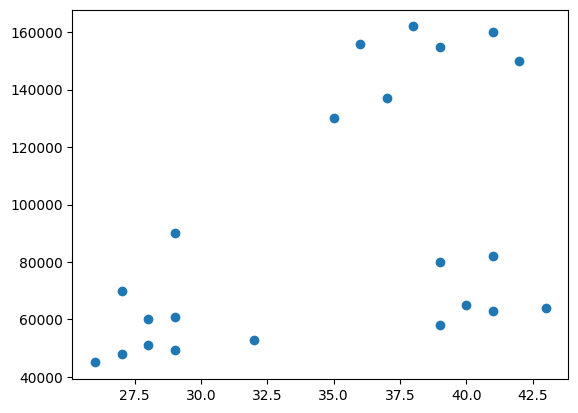

In [ ]:
plt.scatter(df['Age'],df['Income($)'])

In [ ]:
km = KMeans(n_clusters=3)
km.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 'warn',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [ ]:
y_pred= km.fit_predict(df[['Age','Income($)']])
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [ ]:
df['Cluster']= y_pred

df.head(10)

,Name,Age,Income($),Cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


Text(0.5, 1.0, 'Clusters')

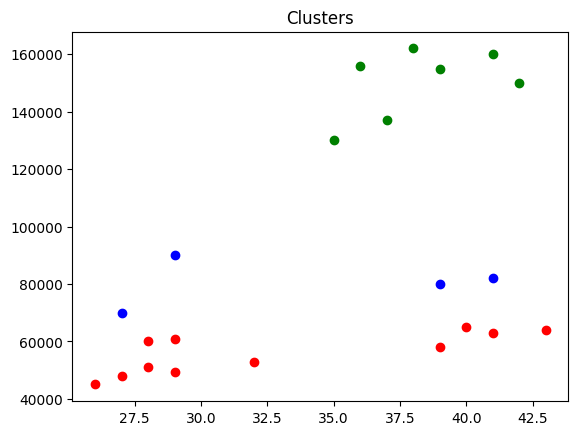

In [ ]:
df1= df[df.Cluster==1]
df2= df[df.Cluster==2]
df3= df[df.Cluster==0]

plt.scatter(x=df1.Age,y=df1['Income($)'],color='green')
plt.scatter(x=df2.Age,y=df2['Income($)'],color='red')
plt.scatter(x=df3.Age,y=df3['Income($)'],color='blue')

plt.title("Clusters")

In [ ]:
scaler= MinMaxScaler()
scaler.fit(df[['Income($)']])

df['Income($)'] = scaler.transform(df['Income($)'].values.reshape(-1, 1))

df['Income($)']

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


0     0.213675
1     0.384615
2     0.136752
3     0.128205
4     0.897436
5     0.940171
6     0.982906
7     1.000000
8     0.948718
9     0.726496
10    0.786325
11    0.000000
12    0.025641
13    0.051282
14    0.038462
15    0.068376
16    0.170940
17    0.153846
18    0.162393
19    0.299145
20    0.316239
21    0.111111
Name: Income($), dtype: float64

In [ ]:
scaler.fit(df[['Age']])

df['Age'] = scaler.transform(df['Age'].values.reshape(-1, 1))

df['Age']

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


0     0.058824
1     0.176471
2     0.176471
3     0.117647
4     0.941176
5     0.764706
6     0.882353
7     0.705882
8     0.588235
9     0.529412
10    0.647059
11    0.000000
12    0.058824
13    0.117647
14    0.176471
15    0.352941
16    0.823529
17    0.882353
18    1.000000
19    0.764706
20    0.882353
21    0.764706
Name: Age, dtype: float64

In [ ]:
df

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [ ]:
km= KMeans(n_clusters=3)

y_pred= km.fit_predict(df[['Age','Income($)']])
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [ ]:
df['New_Cluster']= y_pred

df.head(10)

,Name,Age,Income($),Cluster,New_Cluster
0,Rob,0.058824,0.213675,0,1
1,Michael,0.176471,0.384615,0,1
2,Mohan,0.176471,0.136752,2,1
3,Ismail,0.117647,0.128205,2,1
4,Kory,0.941176,0.897436,1,0
5,Gautam,0.764706,0.940171,1,0
6,David,0.882353,0.982906,1,0
7,Andrea,0.705882,1.000000,1,0
8,Brad,0.588235,0.948718,1,0
9,Angelina,0.529412,0.726496,1,0


Text(0.5, 1.0, 'New_Clusters')

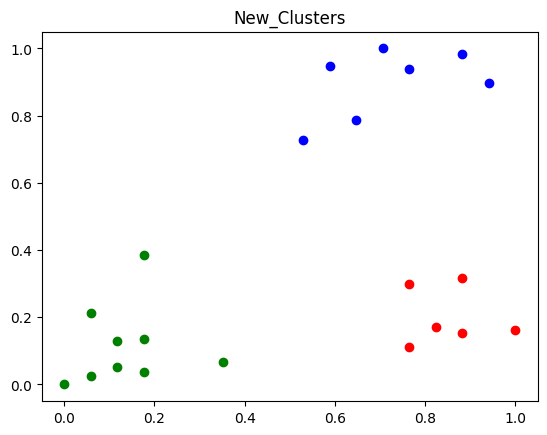

In [ ]:
df1= df[df.New_Cluster==1]
df2= df[df.New_Cluster==2]
df3= df[df.New_Cluster==0]

plt.scatter(x=df1.Age,y=df1['Income($)'],color='green')
plt.scatter(x=df2.Age,y=df2['Income($)'],color='red')
plt.scatter(x=df3.Age,y=df3['Income($)'],color='blue')

plt.title("New_Clusters")

In [ ]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

Text(0.5, 1.0, 'New_Clusters')

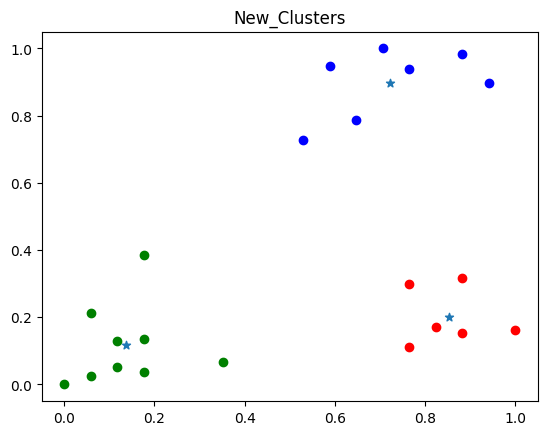

In [ ]:
df1= df[df.New_Cluster==1]
df2= df[df.New_Cluster==2]
df3= df[df.New_Cluster==0]

plt.scatter(x=df1.Age,y=df1['Income($)'],color='green')
plt.scatter(x=df2.Age,y=df2['Income($)'],color='red')
plt.scatter(x=df3.Age,y=df3['Income($)'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='*',label="Centroid")

plt.title("New_Clusters")

# Elbow Method

In [ ]:
k_range= range(1,10)

sse = []
for k in k_range:
    km= KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

sse

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[5.434011511988176,
 2.091136388699076,
 0.47507834985530906,
 0.3491047094419562,
 0.28184797443662357,
 0.23047208837899535,
 0.17840674931327916,
 0.13265419827245145,
 0.10188787724979412]

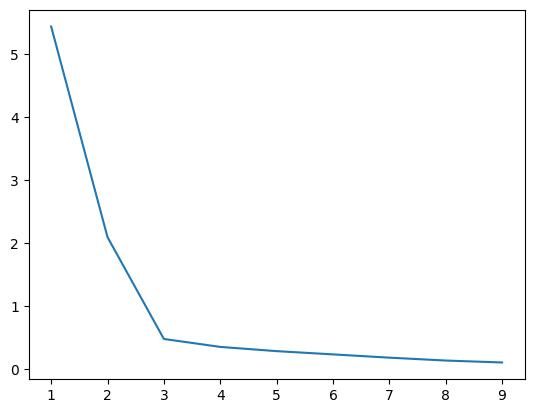

In [ ]:
plt.plot(k_range,sse)